In [1]:
includet("model.jl")

┌ Info: Recompiling stale cache file /kuacc/users/ikesen16/.julia/compiled/v1.1/Sloth/WC84r.ji for Sloth [599f0d3e-fa5b-11e8-3d5f-e1ebc21cfa8f]
└ @ Base loading.jl:1184


In [15]:
Knet.@load "/scratch/users/ikesen16/repos/ilkerkesen/RAM/models/scale1-rmsprop-best.jld2"

3-element Array{Symbol,1}:
 :ram    
 :history
 :o      

In [16]:
history[end]

10-element Array{Float64,1}:
 -0.03730936222965814 
  0.06658853673528464 
  0.022401144182046164
 -0.12629904314698895 
  0.9780315170940171  
  0.2812094644890918  
  0.2205905322388019  
  0.04881957771759994 
  0.011799354532689951
  0.9467147435897436  

In [17]:
include(Knet.dir("data", "mnist.jl"))
using Plots
using ArgParse
using Dates
using Images

error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x0000000000006470)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x0000000000006470)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x0000000000006470)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x0000000000006470)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x0000000000006470)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x0000000000006470)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x0000000000006470)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x0000000000006470)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x0000000000

error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x000000000000647d)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x000000000000647d)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x000000000000647d)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x000000000000647d)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x000000000000647d)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x000000000000647d)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x000000000000647d)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x000000000000647d)
error in running finalizer: MethodError(f=typeof(Base.getindex)(), args=(nothing, 1), world=0x0000000000

In [18]:
x,y = first(dtst)

UndefVarError: UndefVarError: dtst not defined

In [19]:
xtrn, ytrn, xtst, ytst = mnist()
μ, σ = mean(xtrn), std(xtrn)
xtrn = (xtrn .- μ) ./ σ
xtst = (xtst .- μ) ./ σ;

┌ Info: Loading MNIST...
└ @ Main /kuacc/users/ikesen16/.julia/packages/Knet/05UDD/data/mnist.jl:33


In [20]:
dtst = minibatch(xtst, ytst, 1; xtype=KnetArray{Float64})

Knet.Data{Tuple{KnetArray{Float64,4},Array{UInt8,1}}}(Float32[-0.424074 -0.424074 … -0.424074 -0.424074; -0.424074 -0.424074 … -0.424074 -0.424074; … ; -0.424074 -0.424074 … -0.424074 -0.424074; -0.424074 -0.424074 … -0.424074 -0.424074], UInt8[0x07 0x02 … 0x05 0x06], 1, 10000, false, 10000, 1:10000, false, (28, 28, 1, 10000), (10000,), KnetArray{Float64,N} where N, Array{UInt8,1})

In [39]:
using .Iterators: take, drop

In [157]:
x, y = first(drop(dtst,1));

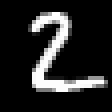

In [158]:
mnistview(Array(x*σ .+ μ),1)

In [167]:
scores, baseline, logπ, ht = ram(x);

In [168]:
scores

10×1 KnetArray{Float64,2}:
 -12.229155771678247
  -3.531536539711638
 -15.725677815418729
 -19.171794388994734
 -24.348543209870343
 -14.943239330603848
 -19.956313129163117
 -23.279139226458692
 -28.411351695955226
 -17.67775249240084 

In [169]:
locs = map(l->Array{Int}(ceil.((l .+ 1) .* 0.5 .* 28.0)), ram.locations)

7-element Array{Array{Int64,2},1}:
 [14; 14]
 [25; 5] 
 [22; 17]
 [24; 7] 
 [19; 10]
 [19; 7] 
 [20; 9] 

In [170]:
x0 = Array(x*σ .+ μ); x0 = reshape(x0, 28, 28, 1)

28×28×1 Array{Float64,3}:
[:, :, 1] =
 1.56791e-9  1.56791e-9  1.56791e-9  …  1.56791e-9  1.56791e-9  1.56791e-9
 1.56791e-9  1.56791e-9  1.56791e-9     1.56791e-9  1.56791e-9  1.56791e-9
 1.56791e-9  1.56791e-9  1.56791e-9     1.56791e-9  1.56791e-9  1.56791e-9
 1.56791e-9  1.56791e-9  1.56791e-9     1.56791e-9  1.56791e-9  1.56791e-9
 1.56791e-9  1.56791e-9  1.56791e-9     1.56791e-9  1.56791e-9  1.56791e-9
 1.56791e-9  1.56791e-9  1.56791e-9  …  1.56791e-9  1.56791e-9  1.56791e-9
 1.56791e-9  1.56791e-9  1.56791e-9     1.56791e-9  1.56791e-9  1.56791e-9
 1.56791e-9  1.56791e-9  1.56791e-9     1.56791e-9  1.56791e-9  1.56791e-9
 1.56791e-9  1.56791e-9  1.56791e-9     1.56791e-9  1.56791e-9  1.56791e-9
 1.56791e-9  1.56791e-9  1.56791e-9     1.56791e-9  1.56791e-9  1.56791e-9
 1.56791e-9  1.56791e-9  1.56791e-9  …  1.56791e-9  1.56791e-9  1.56791e-9
 1.56791e-9  1.56791e-9  1.56791e-9     1.56791e-9  1.56791e-9  1.56791e-9
 1.56791e-9  1.56791e-9  1.56791e-9     1.56791e-9  1.56791e-9

In [171]:
function mnistview1(x)
    # y1 = x[:,:,:,i]
    y2 = permutedims(x,(3,2,1))
    colorview(RGB, y2)
end

mnistview1 (generic function with 2 methods)

In [172]:
# size(x): (W, H, C, B)
# length(locations): num_glimpses
# locations[i] => (x_center, y_center)
draw_glimpses(x, locations, patchsize=8) = map(li->draw_glimpse(x,li,patchsize), locations)
function draw_glimpse(x, location, patchsize=8)
    W, H = size(x)[1:2]
    glimpse = repeat(x, 1, 1, 3);
    x0 = location[1] - div(patchsize,2)
    x1 = x0 + patchsize-1; x0 = max(x0,1); x1 = min(x1,W)
    y0 = location[2] - div(patchsize,2)
    y1 = y0 + patchsize-1; y0 = max(y0,1); y1 = min(y1,H)
    glimpse[x0:x1,[y0,y1],1] .= 1.0;
    glimpse[x0:x1,[y0,y1],2:3] .= 0.0; 
    glimpse[[x0,x1],y0:y1,1] .= 1.0; 
    glimpse[[x0,x1],y0:y1,2:3] .= 0.0; 
    return glimpse
end

draw_glimpse (generic function with 2 methods)

In [173]:
gs = draw_glimpses(x0, locs)

7-element Array{Array{Float64,3},1}:
 [1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9; 1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9; … ; 1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9; 1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9]

[1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9; 1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9; … ; 1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9; 1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9]

[1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9; 1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9; … ; 1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9; 1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9]
 [1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9; 1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9; … ; 1.0 1.56791e-9 … 1.56791e-9 1.56791e-9; 1.0 1.0 … 1.56791e-9 1.56791e-9]

[1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9; 1.56791e-9 1.56791e-9 … 1.56791e-9 1.56791e-9; … ; 0.0 1.56791e-9 … 1.56791e-9 1.56791e-9; 0.0 0.0 … 1.56791e-9 1.56791e-9]

[1.56791e-9 1.56791e-9 … 1.56791e-

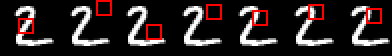

In [174]:
mnistview1(cat(gs...,dims=1))